[View in Colaboratory](https://colab.research.google.com/github/AlliterativeAnchovies/fastDL/blob/master/fastDL_examples.ipynb)

If you've already imported fastDL and dependencies but want to get the latest version of fastDL, use the following:

(Minor problem - you'll need to restart the runtime because for some reason the notebook will not overwrite the fastDL code already ran like it would have if we had instead just copy and pasted fastDL as a code block)



In [1]:
!rm -r fastDL
!git clone https://github.com/AlliterativeAnchovies/fastDL.git
from fastDL.fastDL import *

Cloning into 'fastDL'...
remote: Counting objects: 185, done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 185 (delta 10), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (185/185), 291.15 KiB | 7.46 MiB/s, done.
Resolving deltas: 100% (58/58), done.


Otherwise, if you're installing it for the first time and don't have dependencies, use this:

In [3]:
!pip install fastai
!pip install spacy
!python -m spacy download en
!git clone https://github.com/AlliterativeAnchovies/fastDL.git
from fastDL.fastDL import *

    100% |████████████████████████████████| 122kB 3.6MB/s 
    100% |████████████████████████████████| 1.5MB 6.4MB/s 
    100% |████████████████████████████████| 496.4MB 29kB/s 
    100% |████████████████████████████████| 51kB 12.2MB/s 
    100% |████████████████████████████████| 2.2MB 5.8MB/s 
    100% |████████████████████████████████| 3.6MB 4.8MB/s 
    100% |████████████████████████████████| 51kB 23.5MB/s 
    100% |████████████████████████████████| 112kB 29.9MB/s 
    100% |████████████████████████████████| 184kB 28.3MB/s 
    100% |████████████████████████████████| 61kB 22.4MB/s 
    100% |████████████████████████████████| 112kB 32.7MB/s 
    100% |████████████████████████████████| 11.6MB 2.3MB/s 
    100% |████████████████████████████████| 71kB 8.4MB/s 
    100% |████████████████████████████████| 901kB 2.6MB/s 
    100% |████████████████████████████████| 92kB 26.7MB/s 
    100% |████████████████████████████████| 81kB 17.7MB/s 
    100% |████████████████████████████████| 15.8MB 2

#PascalVOC2012 Tutorial

For Image Recognition

Pascal VOC: https://github.com/fastai/fastai/blob/master/courses/dl2/pascal.ipynb

I'm specifically using 2012 VOC

Download the data:

In [10]:
!wget http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget http://pjreddie.com/media/files/VOC2012test.tar

--2018-08-21 20:28:41--  http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar [following]
--2018-08-21 20:28:41--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  5.82MB/s    in 4m 22s  

2018-08-21 20:33:03 (7.28 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

URL transformed to HTTPS due to an HSTS policy
--2018-08-21 20:33:04--  https://pjreddie.com/media/files/VOC2012test.tar
Resolving pjreddie.com (pjreddie.com)... 128

Create a directory and task:

In [11]:
theModelDirec = ModelDirectory("taskTester","VOCtrainval_11-May-2012.tar","VOC2012test.tar")

Making directories...
copying VOCtrainval_11-May-2012.tar
unzipping VOCtrainval_11-May-2012.tar
copying VOC2012test.tar
unzipping VOC2012test.tar
Finished


In [12]:
!ls taskTester/trainingData

VOCdevkit  VOCtrainval_11-May-2012.tar


In [0]:
theTask = theModelDirec.giveTask("classification","VOCdevkit/VOC2012/JPEGImages","VOCdevkit/VOC2012/Annotations")

ModelDirectories are basically file managers that, given training and validation data, will organize a directory and facilitate the creation of models from that data.

Tasks are specific interpretations of that data.  For example, the PascalVOC dataset, what we're using, has 5 different tasks that the data is labeled for.  Obviously, most of the time we'll be training a model to focus on just 1 of those tasks, but we don't want to throw away all the other data.  So a ModelDirectory can have multiple tasks.  We will just be focused on the multilabel classification task for this dataset.  We named the task 'classification' and gave it the directory of the data and its annotations.

Like previously mentioned, we only want a task to focus on specific data.  Since our annotations are in .xml format, we use the deXMLAnnotations function.  It takes in a list of xpath strings and converts all xml data into just the text data found by those strings.

Before that, though, we need to call "matchFiles".  That function links up the image data with the annotation data.  By default, matchFiles matches them by filename - test_image.jpg will be matched with test_image.xml.  Sometimes, your dataset may use a different system.  If so, matchFiles can take in functions as an argument which will you can use to match the files. (the default argument just removes the file extension.  See documentation for more information on how it works)

In [14]:
theTask.matchFiles()
theTask.deXMLAnnotations([".//object/name"])

De-annotating... (for large data sets, this may take a while)
De-annotation complete


Now, we want to do some final polishing on the data by removing data that had the same label twice (e.g. test.jpg having lables "cow cow cow cow" instead of "cow").  This isn't a necessary thing to do, sometimes we may want there to be repeated labels.  However, that's to complicated for our example.

Next, we want to make a csv file from all this data.  makeCSV takes a string 'a' and creates 3 csv files, a_train, a_val, and a_all.  This is necessary as model training expects everything in csv format.

For this specific dataset, we also call mergeTrainingAndValidation, which causes the dataset to consider everything 'training' and then on model training time take a random 20% to be the validation.  The reason why is because, for some reason, the only labeled validation data in this dataset is that of the person class!

In [15]:
theTask.removeDuplicateAnnotations()
theTask.mergeTrainingAndValidation()
theTask.makeCSV("test")

Making csvs...
Done.   3 Csvs made: taskTester/csvs/test_train.csv, taskTester/csvs/test_val.csv, and taskTester/csvs/test_all.csv


Finally, we can create a fastAI model!  First, we do one last data manipulation to convert our csvs into fastAI data.  Then, we create an empty° model and train it.

°The model is not actually empty, we grab a pretrained one.  That's one of the main bonuses of fastAI, it'd be stupid not to use it!

prepDataForFastAI actually takes in 2 arguments, the model architecture and the size the images should be scaled to.  By default they are resnet34 and 64 by 64.

trainModel() also has arguments it can take, such as learning rate and cycle length.  Check the source to see all.

In [16]:
theTask.prepImageDataForFastAI()
theTask.createModel()
theTask.trainModel()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31855688.46it/s]


Starting training...  This may take a long time.


epoch      trn_loss   val_loss   <lambda>   
    0      0.12343    0.1134     0.961826  

Training over.
Storing predictions...
Predictions stored.


Of course, training a model isn't very useful if you can't use it!  So let's grab a random-ish image and check our model's predictions on it:

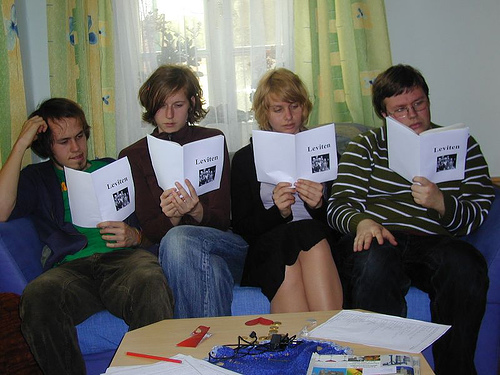

[[0.00141 0.00808 0.00421 0.00178 0.09309 0.0037  0.01186 0.00564 0.13021 0.00203 0.0571  0.01526 0.00331
  0.00403 0.98061 0.03517 0.00229 0.05285 0.00348 0.03046]]
The most prevalent object is predicted to be: person


In [18]:
randomImages = !ls taskTester/validationData/VOCdevkit/VOC2012/JPEGImages
randomImage = np.random.choice(randomImages)
randomFileName = f"taskTester/validationData/VOCdevkit/VOC2012/JPEGImages/{randomImage}"
display(PIL.Image.open(randomFileName))
predicts = theTask.predictFromImageFile(randomFileName)
print(predicts)
print(f"The most prevalent object is predicted to be: {theTask.allClasses[np.argmax(predicts)]}")

#Other Examples
Dogs Vs Cats and Imdb

##Dogs Vs Cats

Download the data and prepare the task:

In [10]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-08-21 20:15:44--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   112MB/s    in 7.4s    

2018-08-21 20:15:52 (111 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [2]:
modelDirec = ModelDirectory("dogsVcats",trainingDataPath = "dogscats.zip",validationDataPath = "")

Making directories...
copying dogscats.zip
unzipping dogscats.zip
Finished


As you can see, the training and validation sets come together in dogsVcats, so we want to extract that
to the validation path in modelDirec

For this we use extractJumbledValidation - it takes a list of directories to prepend to the validation set, and a path to the files themselves.  Directories are relative to dogsVcats/trainingData

In this example, we move all files from dogsVcats/trainingData/**dogscats/valid** to dogsVcats/validationData/**dogscats/train**

Emboldened stuff is what actually depends on the input you gave it.  It is important that, after *dogsVcats/trainingData/* and *dogsVcats/validationData*, both the validations and the trainings have the same path, hence why we renamed it to dogscats/train instead of dogscats/valid.  The reason why is that the Task class expects this.

In [4]:
tp1 = !ls dogsVcats/trainingData/dogscats
tp2 = !ls dogsVcats/validationData
print(tp1)
print(tp2)

['models', 'sample', 'test1', 'train', 'valid']
['dogscats', 'train']


In [5]:
modelDirec.extractJumbledValidation(["dogscats","train"],"dogscats/valid/.")

dogsVcats/validationData/dogscats/train


In [6]:
!ls dogsVcats/validationData/dogscats

train


Now we can finally move on to the task creation.  Unlike PascalVoc, annotations are not a seperate file, but are instead the folders they come in.

In [7]:
theTask = modelDirec.giveTask("classification","dogscats/train",folderCategories=["cats","dogs"])

Making csvs...
Done.   3 Csvs made: dogsVcats/csvs/dogsVcats_train.csv, dogsVcats/csvs/dogsVcats_val.csv, and dogsVcats/csvs/dogsVcats_all.csv


Notice how csvs are automatically made - it means we actually have much less manual work to do then PascalVOC (note: if you wanted to make your own CSVs,  makeCSV() still works for you so you can do some dataprocessing and then just overwrite these csvs, if you don't like how the csvs turned out)

In [7]:
theTask.prepImageDataForFastAI()
theTask.createModel()
theTask.trainModel()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27852032.29it/s]


Starting training...  This may take a long time.


epoch      trn_loss   val_loss   accuracy   
    0      0.30037    0.246044   0.8896    

Training over.
Storing predictions...
Predictions stored.


Finally, let's make a prediction:

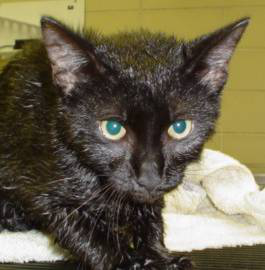

[[-0.00081 -7.11984]]
Hopefully this says 'cats': cats


In [10]:
randomImages = bashLS("dogsVcats/validationData/dogscats/train/cats")
randomImage = np.random.choice(randomImages)
randomFileName = f"dogsVcats/validationData/dogscats/train/cats/{randomImage}"
display(PIL.Image.open(randomFileName))
predicts = theTask.predictFromImageFile(randomFileName)
print(predicts)
print(f"Hopefully this says 'cats': {theTask.allClasses[np.argmax(predicts)]}")

##IMDB Review Negativity

In [6]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2018-08-21 18:34:38--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.8MB/s    in 3.7s    

2018-08-21 18:34:42 (21.8 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [4]:
imdbDirec = ModelDirectory("imdbReviews","aclImdb_v1.tar.gz")

Making directories...
copying aclImdb_v1.tar.gz
unzipping aclImdb_v1.tar.gz
unzipping aclImdb_v1.tar
Finished


If we look at the file structure:

imdbReviews/trainingData/aclImdb/train has a neg and a pos folder

imdbReviews/trainingData/aclImdb/test also has neg and pos, and is the validation folder.

Like dogsVcats, we will want to use extractJumbledValidation

In [5]:
imdbDirec.extractJumbledValidation(["aclImdb","train"],"aclImdb/test/.")

imdbReviews/validationData/aclImdb/train


In [7]:
imdbTask = imdbDirec.giveTask("classification","aclImdb/train",folderCategories=["pos","neg"])

Making csvs...
Done.   3 Csvs made: imdbReviews/csvs/imdbReviews_train.csv, imdbReviews/csvs/imdbReviews_val.csv, and imdbReviews/csvs/imdbReviews_all.csv


Now you may have noticed something different about this dataset - it's text data, not image data!  They are fundamentally different!  Instead of prepImageDataForFastAI, we will use prepTextDataForFastAI.  Unfortunately, this will take a long time - tokenizing all of the text data takes a long time!

In [8]:
imdbTask.prepTextDataForFastAI()

Opening text files...
All text files have been successfully perused.
2 Csvs made: imdbReviews/csvs/textdata_train_pandas.csv and imdbReviews/csvs/textdata_validation_pandas.csv
Tokenizing...  This will take a while
0
1
2
3
4
5
6
7
8
9
10
11
12
0
1
2
3
4
5
6
7
8
9
10
11
12
Tokenizing over!  Data preparation complete.


Now, the code works exactly the same as on images.

In [0]:
imdbTask.createModel()

In [0]:
imdbTask.trainModel()

Starting training...  This may take a long time.


  4%|▍         | 40/1042 [28:23<11:51:24, 42.60s/it, loss=0.695]